In [29]:
import math
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
import networkx as nx

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

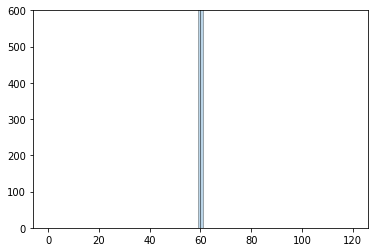

0 0.005808484284129089


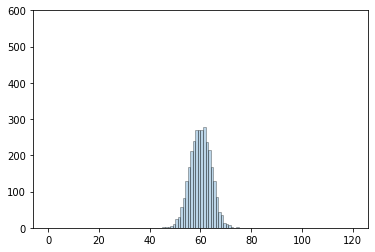

500000 4.083415102236067


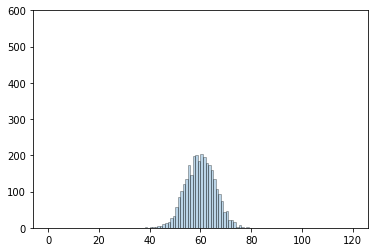

1000000 5.746771930512316


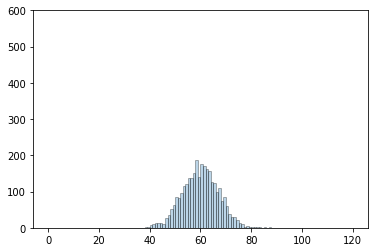

1500000 7.089022437506068


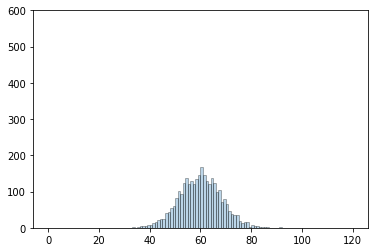

2000000 8.11146512751967


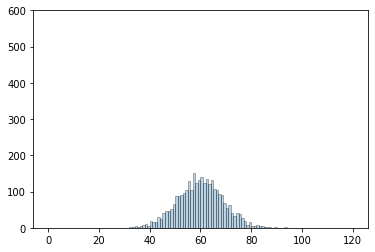

2500000 9.019878990966


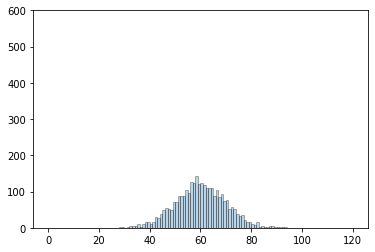

3000000 9.887559490453903


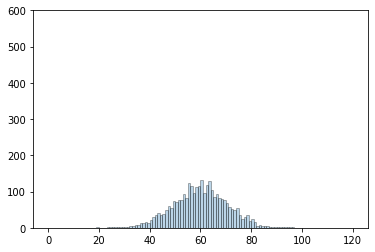

3500000 10.678881784286895


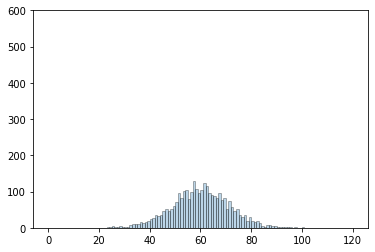

4000000 11.337478831500272


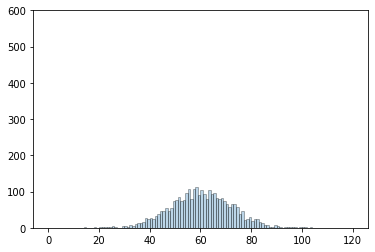

4500000 12.035805662000865


In [26]:
population = 3000
pop = [60.0]* population
stdev=[]
bins=[i for i in range(0,121)]
for t in range(5000000):
    for i in range(population):
        pop[i]+=rnd.random()*0.02-0.01
    if t % 500000 ==0:
        plt.ylim([0,600])
        plt.hist(pop,alpha=0.3,edgecolor="black",bins=bins)
        plt.show()
        std = np.std(pop)
        stdev.append(std)
        print(t,std)


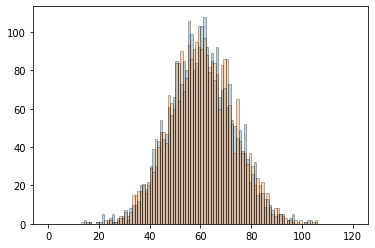

12.741824285458922 12.909065097428273


In [39]:
n2,bins,pat = plt.hist(pop,alpha=0.3,edgecolor="black",bins=bins)
gen_ch_data = np.random.normal(loc=60, scale=12.7, size=3000)
n4,bins,pat = plt.hist(gen_ch_data,alpha=0.3,edgecolor="black",bins=bins)
plt.show()
std_p = np.std(pop)
std_gen = np.std(gen_ch_data)
print(std_p,std_gen)

120 120
RMSE: 5.084190910813497
R-squared: 0.9757585691391759


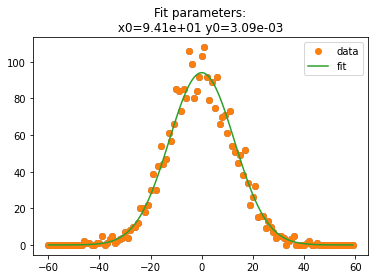

In [28]:
xdata = [i for i in range(-60,60)]
ydata = n2
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))


print('RMSE:', RMSE)
print('R-squared:', Rsquared)

In [30]:
chns_data = np.genfromtxt("Data/BW.csv", delimiter=",")
print(chns_data[0:10])

[64.2 71.5 79.5 58.1 75.2 60.2 56.8 95.1 71.8 61.5]


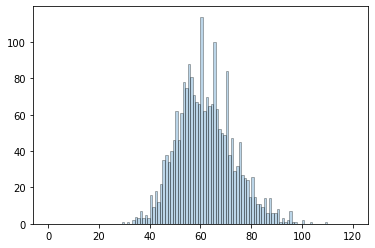

In [31]:
n1,bins,pat = plt.hist(chns_data,alpha=0.3,edgecolor="black",bins=bins)

In [32]:
std_ch = np.std(chns_data)
print(std_ch)

11.257643960834283


120 120
RMSE: 7.282113408808828
R-squared: 0.9283870324212838


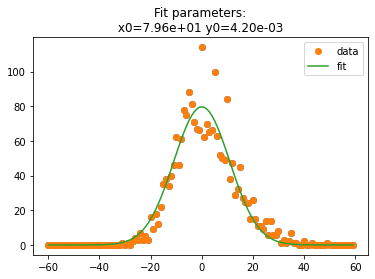

In [33]:
xdata = [i for i in range(-60,60)]
ydata = n1
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))


print('RMSE:', RMSE)
print('R-squared:', Rsquared)

In [34]:
gen_ch_data = np.random.normal(loc=60, scale=11.26, size=3000)

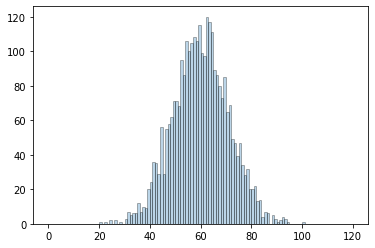

In [35]:
n3,bins,pat = plt.hist(gen_ch_data,alpha=0.3,edgecolor="black",bins=bins)

120 120


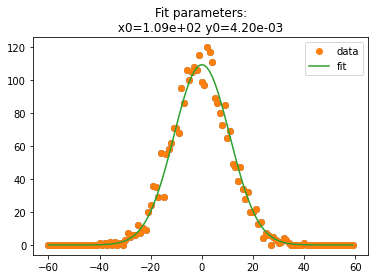

In [36]:
xdata = [i for i in range(-60,60)]
ydata = n3
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))